In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95%}</style>"))

In [3]:
from importlib import reload
import sys
sys.path.insert(0,'/home/jkumar16/MyModules')
import ModelValidation as mv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Interpretation Odds Ratio in Logistic Regression 

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
#### Calculation of intercept $\beta_0$ : 
#### $logit(p) = \log (\frac{p}{1-p}) = \beta_0 + \beta_1 X$



In [123]:
p = np.linspace(0, 1, 100, endpoint=False)
odds = p/(1-p)
logodds = np.log(odds)

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


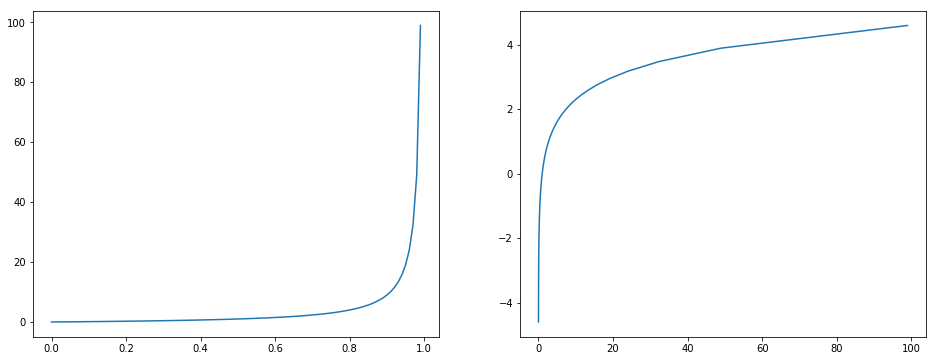

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(p, odds)
ax2. plot(odds, logodds)

In [162]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = np.ones((10000,)).reshape(-1, 1)
y = default_df['default'].factorize()[0]

logit = smf.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.146032
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9999
Method:                           MLE   Df Model:                            0
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                   0.000
Time:                        10:59:23   Log-Likelihood:                -1460.3
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3683      0.056    -60.434      0.000      -3.478      -3.259
==============================================================================
"""

In [163]:
# Calculation of intercept
p = 333/10000
odds = p/(1-p)
np.log(odds)

-3.3683308124841616

In [164]:
df = pd.read_csv('./data/sample.csv')
df.head()

,female,read,write,math,hon,femalexmath
0,0,57,52,41,0,0
1,1,68,59,53,0,53
2,0,44,33,54,0,0
3,0,63,44,47,0,0
4,0,47,52,57,0,0


In [167]:
X = np.ones((200,)).reshape(-1, 1)
y = df['hon']

logit = smf.Logit(y, X).fit()
logit.summary()


Optimization terminated successfully.
         Current function value: 0.556775
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hon   No. Observations:                  200
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                            0
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                   0.000
Time:                        14:04:31   Log-Likelihood:                -111.36
converged:                       True   LL-Null:                       -111.36
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1255      0.164     -6.845      0.000      -1.448      -0.803
==============================================================================
"""

In [168]:
df['hon'].value_counts()

0    151
1     49
Name: hon, dtype: int64

In [169]:
# calculation of intercept
p = 49/200
odds = p/(1-p)
np.log(odds)

-1.1254595387042978

### Logistic regression with a single dichotomous predictor variables

In [171]:
X = df['female']
X = sm.add_constant(X)
y = df['hon']

logit = smf.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.549016
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hon   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                 0.01394
Time:                        14:06:32   Log-Likelihood:                -109.80
converged:                       True   LL-Null:                       -111.36
                                        LLR p-value:                   0.07811
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4709      0.269     -5.469      0.000      -1.998      -0.944
female         0.5928      0.341      1.736      0.083      -0.076       1.262
==============================================================================
"""

In [192]:
pd.pivot_table(df, index='hon', columns='female', aggfunc='count')['read']

female,0,1
hon,,
0,74,77
1,17,32


In [208]:
# odds of male being in the honors class
odds_male = (17/91)/(74/91)
odds_female = 32/77
ratio_female_to_male = (32/77)/(17/74)

# incept of the logit
intercept = np.log(odds_male) ## The intercept of -1.471 is the log odds for males since male is the reference group (female = 0)

# The coefficient for female is the log of odds ratio between the female group and male group
coeff = np.log(ratio_female_to_male)

In [209]:
coeff

0.59278223009399644

In [210]:
np.exp(coeff)

1.8090145148968679

In [211]:
ratio_female_to_male

1.809014514896868

In [204]:
(odds_female - odds_male)/odds_male

0.8090145148968678

### Logistic regression with a single continuous predictor variable

In [212]:
X = df['math']
X = sm.add_constant(X)
y = df['hon']

logit = smf.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.417683
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hon   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.2498
Time:                        14:30:56   Log-Likelihood:                -83.537
converged:                       True   LL-Null:                       -111.36
                                        LLR p-value:                 8.718e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7939      1.482     -6.610      0.000     -12.698      -6.890
math           0.1563      0.026      6.105      0.000       0.106       0.207
==============================================================================
"""

In this case, the estimated coefficient for the intercept is the log odds of a student with a math score of zero being in an honors class.  In other words, the odds of being in an honors class when the math score is zero is exp(-9.793942) = .00005579.  These odds are very low, but if we look at the distribution of the variable math, we will see that no one in the sample has math score lower than 30.  In fact, all the test scores in the data set were standardized around mean of 50 and standard deviation of 10.  So the intercept in this model corresponds to the log odds of being in an honors class when math is at the hypothetical value of zero.

In [213]:
np.exp(-9.7939)

5.579088796666687e-05

In [214]:
np.exp(.1563404)

1.1692241392542935

### Logistic regression with multiple predictor variables and no interaction terms

In [215]:
X = df[['math', 'female', 'read']]
X = sm.add_constant(X)
y = df['hon']

logit = smf.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.390424
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hon   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.2988
Time:                        14:45:31   Log-Likelihood:                -78.085
converged:                       True   LL-Null:                       -111.36
                                        LLR p-value:                 2.348e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7702      1.711     -6.880      0.000     -15.123      -8.417
math           0.1230      0.031      3.931      0.000       0.062       0.184
female         0.9799      0.422      2.324      0.020       0.154       1.806
read           0.0591      0.027      2.224      0.026       0.007       0.111
==============================================================================
"""

### Logistic regression with an interaction term of two predictor variables

In [216]:
df['female_x_math'] = df['female']*df['math']

X = df[['female', 'math', 'female_x_math']]
X = sm.add_constant(X)
y = df['hon']

logit = smf.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.399417
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hon   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.2826
Time:                        14:51:01   Log-Likelihood:                -79.883
converged:                       True   LL-Null:                       -111.36
                                        LLR p-value:                 1.381e-13
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.7458      2.129     -4.108      0.000     -12.919      -4.573
female           -2.8999      3.094     -0.937      0.349      -8.964       3.165
math              0.1294      0.036      3.605      0.000       0.059       0.200
female_x_math     0.0670      0.053      1.253      0.210      -0.038       0.172
=================================================================================
"""